In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_breast_cancer, make_moons
from sklearn.model_selection import train_test_split

from itertools import product
from typing import List

## 1. Define the model

In [2]:
class LogisticRegressor(object):
    
    def __init__(self, learning_rate=0.1, num_epochs=1000, eps=1e-8, l2_regularization_rate=0, rng_seed=None) -> None:
        self.__alpha = learning_rate
        self.__lambda = l2_regularization_rate
        self.__iter = num_epochs
        self.__eps = eps
        self.__rng = np.random.default_rng() if rng_seed is None else np.random.default_rng(rng_seed)
    

    def fit(self, X: np.ndarray, y: np.ndarray) -> List[float]:
        errors = []
        last_error = None

        self.__w = self.__rng.random(X.shape[1])
        self.__b = self.__rng.random(1)

        for e in range(self.__iter):
            y_hat = self.predict(X)

            error = self._cost(y_hat, y)

            dj_dw = self._weight_cost_derivative(y, y_hat, X)
            dj_db = self._bias_cost_derivative(y, y_hat)

            self.__w = self._weight_regularization_derivative(len(y)) * self.__w - self.__alpha * dj_dw
            self.__b = self.__b - self.__alpha * dj_db

            errors.append(error)

            if e % (self.__iter / 10) == 0:
                print(f"Iter[{e}], cost: {error}")

            if last_error and self.__eps is not None and abs(error - last_error) < self.__eps:
                return errors
            
            last_error = error
    
        return errors
    

    def predict(self, X: np.ndarray) -> np.ndarray:
        return self._model(X, self.__w, self.__b)
    

    def _regularization_cost(self, num_samples: int) -> float:
        return (self.__lambda / (2 * num_samples)) * np.sum(self.__w ** 2)
    

    def _cost(self, y_hat: np.ndarray, y: np.ndarray) -> float:
        cost = LogisticRegressor._model_cost(y_hat, y)
        
        return cost + self._regularization_cost(len(y))
    

    def _weight_regularization_derivative(self, num_samples: int) -> float:
        reg_coeff = self.__alpha * (self.__lambda / num_samples)

        return (1 - reg_coeff)

    
    @staticmethod
    def _sigmoid(x: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-x))


    @staticmethod
    def _model(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray:
        return LogisticRegressor._sigmoid(np.dot(X, w) + b)

    
    @staticmethod
    def _model_cost(y_hat: np.ndarray, y: np.ndarray) -> float:
        return -np.average(y * np.log(y_hat + 1e-20) + (1 - y) * np.log(1 - y_hat + 1e-20))
    

    @staticmethod
    def _weight_cost_derivative(y: np.ndarray, y_hat: np.ndarray, X: np.ndarray) -> np.ndarray:
        return np.average((y_hat - y).reshape(-1, 1) * X, axis=0)


    @staticmethod
    def _bias_cost_derivative(y: np.ndarray, y_hat: np.ndarray) -> float:
        return np.average(y_hat - y)

## 2. Test the model on generated dummy dataset

In [3]:
X, y = make_classification(n_samples=4, n_features=3, n_informative=3, n_redundant=0, random_state=42)

print(X)
print(y)

[[-0.43218445 -1.28299346 -1.12207467]
 [-1.46843074  1.04690302 -0.37948116]
 [-0.76564285 -1.93836023  1.25568414]
 [-0.23799861 -1.14079428  0.21529512]]
[0 1 0 1]


In [4]:
alpha = 1
num_epochs = 10000

model = LogisticRegressor(learning_rate=alpha, num_epochs=num_epochs, rng_seed=0)
costs = model.fit(X, y)

Iter[0], cost: 0.6884007589773556
Iter[1000], cost: 0.02634513088746663
Iter[2000], cost: 0.012908914233448206
Iter[3000], cost: 0.008513082773130433
Iter[4000], cost: 0.006342501834160667
Iter[5000], cost: 0.005051132431856395
Iter[6000], cost: 0.004195463324674377
Iter[7000], cost: 0.003587096833098592
Iter[8000], cost: 0.0031324834232711717
Iter[9000], cost: 0.002779938462693406


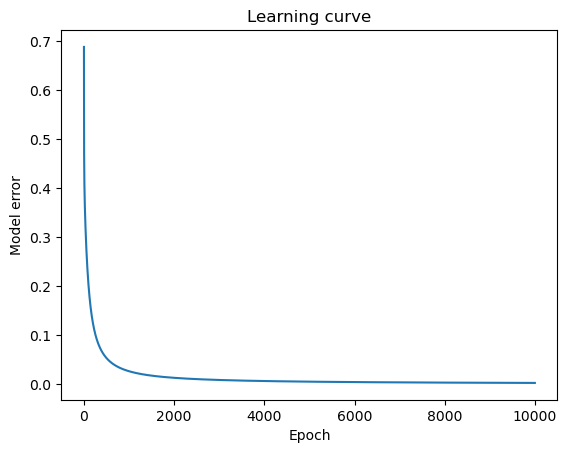

In [5]:
fig, ax = plt.subplots()

ax.plot(np.arange(len(costs)), costs)

ax.set_title("Learning curve")
ax.set_xlabel("Epoch")
ax.set_ylabel("Model error")

plt.show()

## 3. Test the model on toy dataset

In [6]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [8]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The features have different ranges (e.g `mean radius` vs `mean area`) so we need to normalize them.\
Below we've performed Z-score normalization.

In [9]:
means = dict()
stddevs = dict()

for column in X.columns:
    mean = X[column].mean()
    stddev = X[column].std()

    X[column] = (X[column] - mean) / stddev

    means[column] = mean
    stddevs[column] = stddev

In [10]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.311195e-16,6.243785e-17,-1.123881e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,2.497514e-17,-4.995028e-17,1.748260e-16,4.838933e-16,...,-8.241796e-16,0.000000,-3.496520e-16,1.248757e-17,-2.372638e-16,-3.246768e-16,8.741299e-17,2.247763e-16,2.747265e-16,-5.744282e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-0.747971,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-0.043477,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,0.657762,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

426 426
143 143


In [12]:
model = LogisticRegressor(learning_rate=1, num_epochs=2000, rng_seed=0)

costs = model.fit(X_train.values, y_train.values)

Iter[0], cost: 7.738076208099967
Iter[200], cost: 0.0551912188525434
Iter[400], cost: 0.04765944241161284
Iter[600], cost: 0.04330919704286848
Iter[800], cost: 0.040352075319819346
Iter[1000], cost: 0.03818278803535959
Iter[1200], cost: 0.03650595835932952
Iter[1400], cost: 0.035157191946283896
Iter[1600], cost: 0.03403838026275237
Iter[1800], cost: 0.033087566546200646


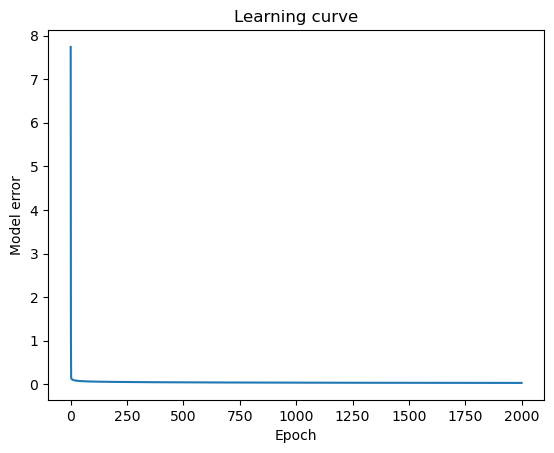

In [13]:
fig, ax = plt.subplots()

ax.plot(np.arange(len(costs)), costs)

ax.set_title("Learning curve")
ax.set_xlabel("Epoch")
ax.set_ylabel("Model error")

plt.show()

In [14]:
"""
              expected

        |   T    |    F    |
     ---|--------|---------|
  a     |        |         |
  c   T |   TP   |   FP    |
  t     |        |         |
  u  ---|--------|---------|
  a     |        |         |
  l   F |   FN   |   TN    |
        |        |         |
     -----------------------
    
    <X>P - when the model classified the item as TRUE
    <X>N - when the model classified the item as FALSE

    T<X> - when the item is correctly classified
        TP (true positive) - correctly classified as TRUE
        TN (true negative) - correctly classified as FALSE

    F<X> - when the item is incorrectly classified
        FP (false positive) - incorrectly classified as TRUE (was FALSE)
        FN (false negative) - incorrectly classified as FALSE (was TRUE)
"""


def accuracy(y_pred: np.ndarray, y: np.ndarray) -> float:
    """
        Returns the percentage of correctly classified items.

        accuracy = (TP + TN) / (TP + TN + FP + FN)
    """
    return np.sum(y_pred == y) / len(y_pred)


def precision(y_pred: np.ndarray, y: np.ndarray) -> float:
    """
        Returns the percentage of correctly classified positives
        from all the items the model classified as positive.

        precision = (TP) / (TP + FP)
    """
    return np.sum((y_pred == y) & (y == 1)) / np.sum(y_pred == 1)


def recall(y_pred: np.ndarray, y: np.ndarray) -> float:
    """
        Returns the percentange of correctly classified positives
        from all the items that should have been classified as positive.

        recall = (TP) / (TP + FN)
    """
    return np.sum((y_pred == y) & (y == 1)) / np.sum(y == 1)


def f1_score(y_pred: np.ndarray, y: np.ndarray) -> float:
    """
        Returns the F1-score. The harmonic mean between the precision and recall.

        f1_score = 2 / (1 / precision + 1 / recall)
        
        Or in the simplified form:

        f1_score = 2 * precision * recall / (precision + recall)
    """
    p = precision(y_pred, y)
    r = recall(y_pred, y)

    return (2 * p * r) / (p + r)

In [15]:
y_pred = model.predict(X_train)
y_pred = (y_pred >= .5).astype(int)

print(f"Acc. train: {accuracy(y_pred, y_train):.3f}")
print(f"Prec. train: {precision(y_pred, y_train):.3f}")
print(f"Recall train: {recall(y_pred, y_train):.3f}")
print(f"F1 train: {f1_score(y_pred, y_train):.3f}")
print()

y_pred = model.predict(X_test)
y_pred = (y_pred >= .5).astype(int)

print(f"Acc. test: {accuracy(y_pred, y_test):.3f}")
print(f"Prec. test: {precision(y_pred, y_test):.3f}")
print(f"Recall test: {recall(y_pred, y_test):.3f}")
print(f"F1 test: {f1_score(y_pred, y_test):.3f}")

Acc. train: 0.988
Prec. train: 0.985
Recall train: 0.996
F1 train: 0.991

Acc. test: 0.944
Prec. test: 0.966
Recall test: 0.944
F1 test: 0.955


## 4. Test regularization on dummy data

In [16]:
def binomial_feature_augmenter(X: np.ndarray, degree: int = 2) -> np.ndarray:
    """
    Augments the dataset using feature combinations given by the binomial model.

    !!! Only works for datasets containing 2 features.

    E.g having 2 features (a, b):
    
    n = 2: will create features [a ^ 2, a * b, b ^ 2]
    n = 3: will create features [a ^ 3, a ^ 2 * b, b ^ 2 * a, b ^ 3]
    """

    X_temp = np.zeros((X.shape[0], X.shape[1] + degree + 1))
    
    # copy the contents of X into X_temp
    X_temp[:, :X.shape[1]] = X

    for col_idx, ndeg in enumerate(range(degree, -1, -1), X.shape[1]):
        X_temp[:, col_idx] = X_temp[:, 0] ** ndeg * X_temp[:, 1] ** (degree - ndeg)

    return X_temp

In [17]:
def z_score_norm(X: np.ndarray, means: np.ndarray = None, stddev: np.ndarray = None) -> np.ndarray:
    means = X.mean(axis=0) if means is None else means
    stddev = X.std(axis=0) if stddev is None else stddev

    return (X - means) / stddev, means, stddev

In [18]:
# Load the dataset and do the train/test split

X_train, X_test, y_train, y_test = train_test_split(*make_moons(300, noise=.2, random_state=0), random_state=0)

print(f"x_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}, y_test: {y_test.shape}")

x_train: (225, 2), y_train: (225,)
x_test: (75, 2), y_test: (75,)


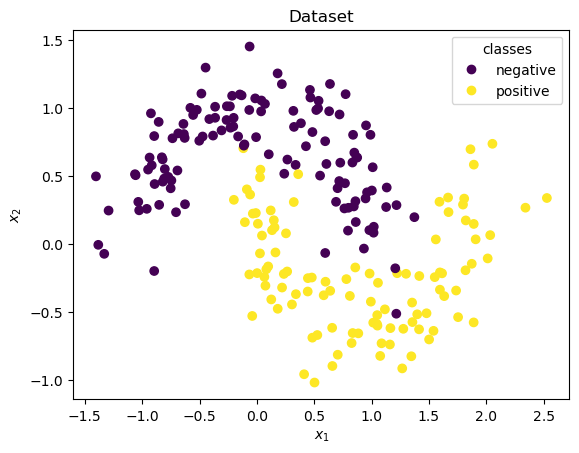

In [19]:
# Plot the training set

fig, ax = plt.subplots()

scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

ax.legend(handles=scatter.legend_elements()[0], 
           labels=['negative', 'positive'],
           title="classes")

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title("Dataset")

plt.show()

In [20]:
# Create and train a model with just the input features

lr = .1
epochs = 20000

simple_model = LogisticRegressor(learning_rate=lr, num_epochs=epochs, rng_seed=0)
costs = simple_model.fit(X_train, y_train)

Iter[0], cost: 0.6726682631982918
Iter[2000], cost: 0.29695084348516276
Iter[4000], cost: 0.29645887528613885


In [21]:
# Compute the model's results

feature_1 = np.arange(-3, 3, .1)
feature_2 = np.arange(-3, 3, .1)

features = np.array(list(product(feature_1, feature_2)))

y_pred = simple_model.predict(features)

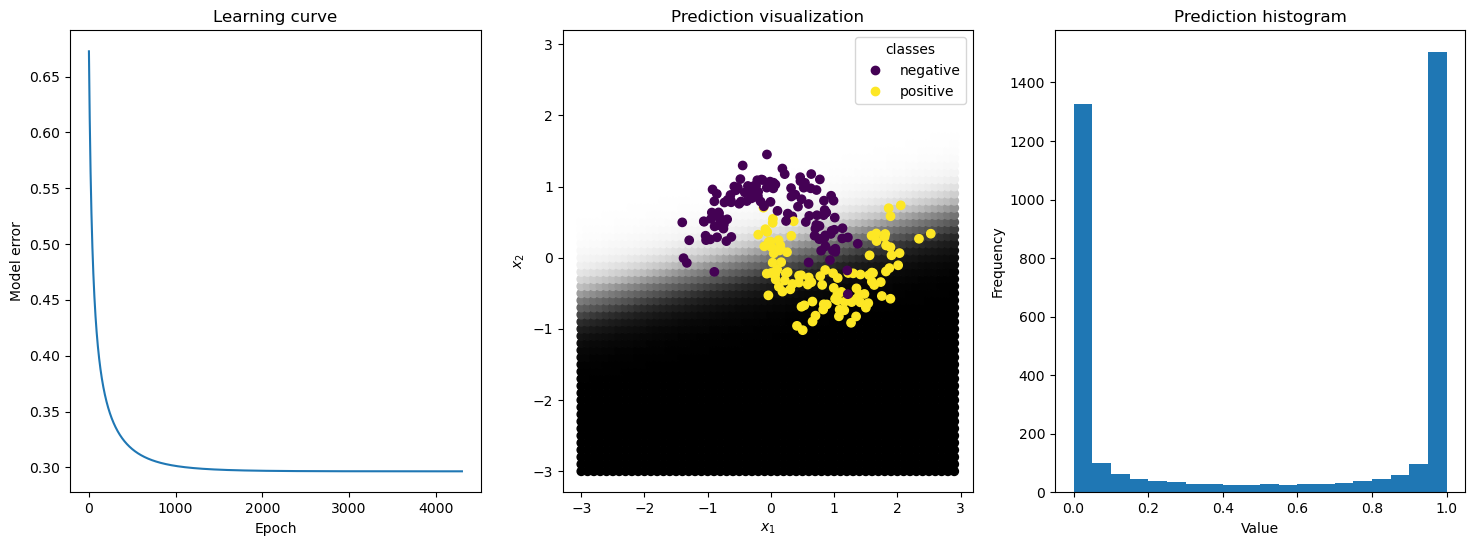

In [22]:
# Visualize the model's results

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(18, 6)

ax1.plot(np.arange(len(costs)), costs)

ax1.set_title("Learning curve")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Model error")

ax2.scatter(features[:, 0], features[:, 1], c=y_pred, cmap='Greys')
scatter = ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

ax2.legend(handles=scatter.legend_elements()[0], 
           labels=['negative', 'positive'],
           title="classes")

ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.set_title("Prediction visualization")

ax3.hist(y_pred, bins=20)
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Value")
ax3.set_title("Prediction histogram")

plt.show()

In [23]:
# Add extra features to the input

AUG_DEGREE=3
X_train_aug = binomial_feature_augmenter(X_train, degree=AUG_DEGREE)
print(X_train_aug[:5])

[[ 8.74638681e-01  6.35278033e-01  6.69092314e-01  4.85983136e-01
   3.52985086e-01  2.56384352e-01]
 [-6.57037794e-02 -2.23330538e-01 -2.83642337e-04 -9.64114946e-04
  -3.27707647e-03 -1.11389521e-02]
 [ 2.66070285e-01  6.20474507e-01  1.88360192e-02  4.39254979e-02
   1.02434030e-01  2.38875620e-01]
 [-8.74167115e-03  2.27700143e-01 -6.68010663e-07  1.74001196e-05
  -4.53232529e-04  1.18056502e-02]
 [ 6.58491294e-01 -8.95859361e-01  2.85528926e-01 -3.88454280e-01
   5.28481403e-01 -7.18984467e-01]]


In [24]:
# The feature's ranges differ (due to the method used for feature engineering)
# So they need to be normalized

X_train_aug_norm, train_means, train_stddev = z_score_norm(X_train_aug)
X_train_aug_norm.shape

(225, 6)

In [25]:
# Create and train a model for the new input

lr = 1
epochs = 100000

model_aug = LogisticRegressor(learning_rate=lr, num_epochs=epochs, rng_seed=0)
costs = model_aug.fit(X_train_aug_norm, y_train)

Iter[0], cost: 0.9971777072428448


In [26]:
# Create the data for the visualization
# The data has to pass the same steps as the training data:
# - feature augmentation
# - feature normalization

feature_1 = np.arange(-3, 3, .1)
feature_2 = np.arange(-3, 3, .1)

features = np.array(list(product(feature_1, feature_2)))
features_aug = binomial_feature_augmenter(features, degree=AUG_DEGREE)
features_aug_norm, _, _ = z_score_norm(features_aug, train_means, train_stddev)
features_aug_norm.shape

(3600, 6)

In [27]:
y_pred = model_aug.predict(features_aug_norm)

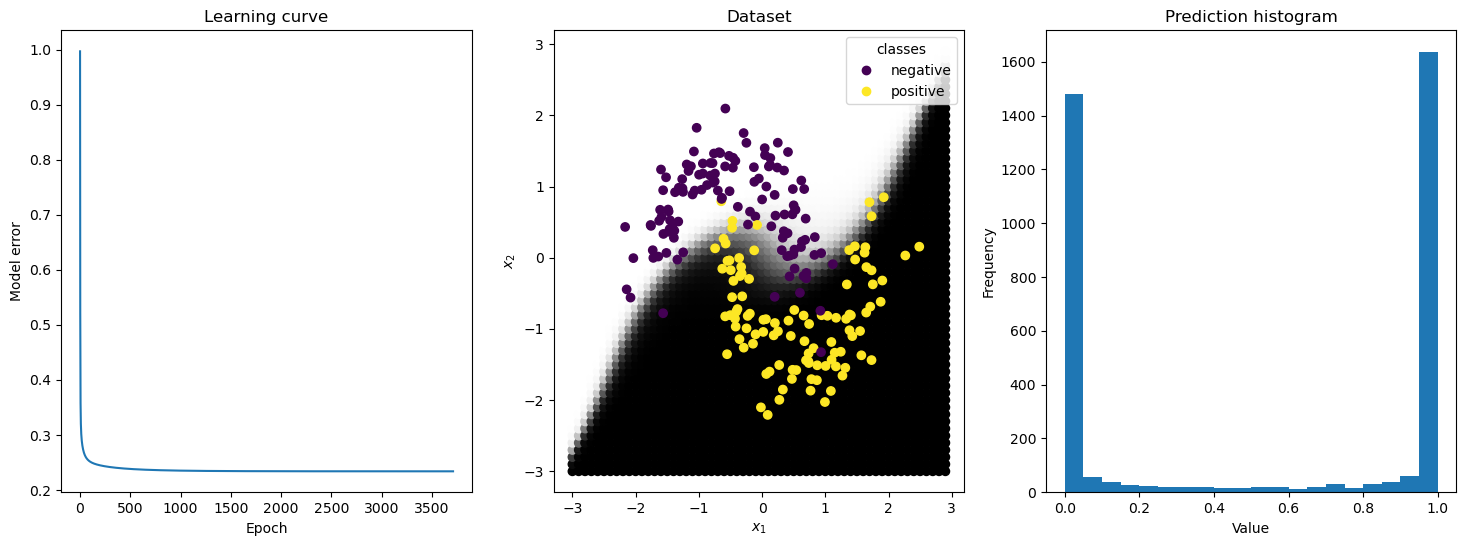

In [28]:
# Visualize the model's results

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(18, 6)

ax1.plot(np.arange(len(costs)), costs)

ax1.set_title("Learning curve")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Model error")

ax2.scatter(features[:, 0], features[:, 1], c=y_pred, cmap='Greys')
scatter = ax2.scatter(X_train_aug_norm[:, 0], X_train_aug_norm[:, 1], c=y_train)

ax2.legend(handles=scatter.legend_elements()[0], 
           labels=['negative', 'positive'],
           title="classes")

ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.set_title("Dataset")

ax3.hist(y_pred, bins=20)
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Value")
ax3.set_title("Prediction histogram")

plt.show()

In [29]:
# Create and train the regularized model on augmented data

lr = .1
epochs = 100000
l2_regularization_rate = .3

reg_model = LogisticRegressor(
    learning_rate=lr,
    num_epochs=epochs,
    l2_regularization_rate=l2_regularization_rate,
    rng_seed=0)

costs = reg_model.fit(X_train_aug_norm, y_train)

Iter[0], cost: 0.998494366096351


In [30]:
# Create the data for visualization

feature_1 = np.arange(-3, 3, .1)
feature_2 = np.arange(-3, 3, .1)

features = np.array(list(product(feature_1, feature_2)))
features_aug = binomial_feature_augmenter(features, degree=AUG_DEGREE)
features_aug_norm, _, _ = z_score_norm(features_aug, train_means, train_stddev)
features_aug_norm.shape

(3600, 6)

In [31]:
y_pred = reg_model.predict(features_aug_norm)

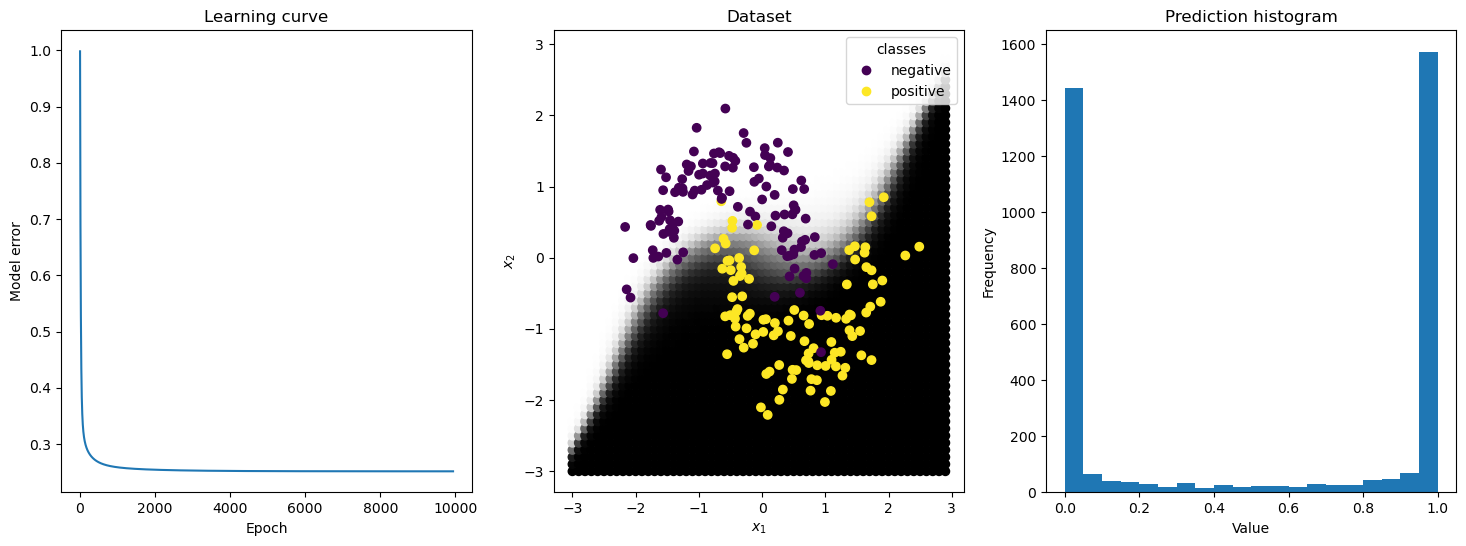

In [32]:
# Visualize the model's results

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(18, 6)

ax1.plot(np.arange(len(costs)), costs)

ax1.set_title("Learning curve")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Model error")

ax2.scatter(features[:, 0], features[:, 1], c=y_pred, cmap='Greys')
scatter = ax2.scatter(X_train_aug_norm[:, 0], X_train_aug_norm[:, 1], c=y_train)

ax2.legend(handles=scatter.legend_elements()[0], 
           labels=['negative', 'positive'],
           title="classes")

ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.set_title("Dataset")

ax3.hist(y_pred, bins=20)
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Value")
ax3.set_title("Prediction histogram")

plt.show()

In [33]:
# Apply the steps used in the train data for the test data
# Needed so that we're testing the model on data with similar (features, domain) to what it trained on.

X_test_aug = binomial_feature_augmenter(X_test, AUG_DEGREE)
X_test_aug_norm, _, _ = z_score_norm(X_test_aug, train_means, train_stddev)

X_test_aug_norm.shape

(75, 6)

In [34]:
# Evaluate the model performance on the test set
# Note: the simple model wasn't trained on augmented, normalized data

y_pred = simple_model.predict(X_test)
y_pred = (y_pred >= .5).astype(int)

print(f"acc: {accuracy(y_pred, y_test)}, recall: {recall(y_pred, y_test)}, prec: {precision(y_pred, y_test)}, f1: {f1_score(y_pred, y_test)}")


y_pred = model_aug.predict(X_test_aug_norm)
y_pred = (y_pred >= .5).astype(int)

print(f"acc: {accuracy(y_pred, y_test)}, recall: {recall(y_pred, y_test)}, prec: {precision(y_pred, y_test)}, f1: {f1_score(y_pred, y_test)}")

y_pred = reg_model.predict(X_test_aug_norm)
y_pred = (y_pred >= .5).astype(int)

print(f"acc: {accuracy(y_pred, y_test)}, recall: {recall(y_pred, y_test)}, prec: {precision(y_pred, y_test)}, f1: {f1_score(y_pred, y_test)}")

acc: 0.8133333333333334, recall: 0.8043478260869565, prec: 0.8809523809523809, f1: 0.8409090909090908
acc: 0.8266666666666667, recall: 0.8695652173913043, prec: 0.851063829787234, f1: 0.8602150537634409
acc: 0.84, recall: 0.8478260869565217, prec: 0.8863636363636364, f1: 0.8666666666666666
